In [10]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [11]:
train_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/U.P.%20Crime%20Data%20-%20Year%202019/MR%20data%20-%20Compiled%20Data%20Set.csv")

In [13]:
train_df = train_df.drop(axis = 1, labels = ['Title','Text'])

In [14]:
train_df.columns = train_df.columns.str.rstrip()
cols_for_reference = train_df.columns.to_list()
print(cols_for_reference)

['City', 'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other', 'Number of child victims', 'Number of male victims(adult)', 'Number of female victims(adult)', 'Kidnnaping:\nNumber of child victims', 'Number of male(adult)', 'Number of female(adult)', 'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act', 'Number of adult victims', 'Number of childs invoved']


In [15]:
train_df = train_df.rename(columns={
    "Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act":
    "Crime Against Women (Combined)"
})

train_df = train_df.rename(columns={
    'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':
    "Reason_for_Murder"
})

"""Number of rows in whole data to get the count of missing values in the data"""
print(len(train_df)) 

466


In [16]:
vals = cols_for_reference[8].split("\n")
vals = vals[1:]
vals = [val[3:] for val in vals]
reason_mapping = (dict(zip(range(10), vals)))
reason_mapping
actions = pd.DataFrame(reason_mapping, index= range(1), columns=vals)
train_df["Crime Against Women (Combined)"].unique()
for idx, vals in enumerate(train_df["Crime Against Women (Combined)"]):
    if(type(vals) == str):
        if(len(vals) <= 2):
            if(int(vals) == 11):
                actions.loc[idx, reason_mapping[int(vals)-2]] = 1
            else:
                actions.loc[idx, reason_mapping[int(vals)-1]] = 1
        else :
            lst = vals.split(",")
            for num in lst:
                actions.loc[idx, reason_mapping[int(num)-1]] = 1
    else:
        actions.loc[idx] = np.nan

In [17]:
train_df = pd.concat([train_df, actions], axis=1)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   City                                                                466 non-null    object 
 1   Reason_for_Murder                                                   147 non-null    object 
 2   Number of child victims                                             13 non-null     float64
 3   Number of male victims(adult)                                       95 non-null     float64
 4   Number of female victims(adult)                                     47 non-null     float64
 5   Kidnnaping:
Number of child victims                                 11 non-null     float64
 6   Number of male(adult)                                               8 non-null      float64
 7   Number of female(

In [19]:
train_df.tail(10)

,City,Reason_for_Murder,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women (Combined),Number of adult victims,...,Murder with Rape,Dowry Deaths(Sec. 3048),Suicide(sec 305/306),Kidnapping(All),Acid Attack(Sec. 326A IPC),Cruelty by Husband/in-laws((Sec.498 A IPC),Rape only(Sec. 376 or 511 IPC),Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC),Cyber Crimes against Women,Protection of Children from Sexual Offences Act
456,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
457,Lucknow,Love Affairs,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
459,Lucknow,Unknown reasons,1.0,1.0,1.0,NaN,NaN,NaN,1,1.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
461,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
462,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN
464,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
465,Lucknow,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
train_df['Crime Against Women (Combined)'].unique()
train_df["Reason_for_Murder"].unique()

array([nan, 'Money Disputes', 'Love Affairs', 'Unknown reasons',
       'Petty Quarrels', 'Property Disputes', 'Family Dispute',
       'Personal Vendetta', 'Casteism'], dtype=object)

In [21]:
cols_to_impute = ["Number of child victims", "Number of female victims(adult)","Number of male victims(adult)",
                  "Number of male(adult)",'Number of female(adult)', 'Number of adult victims', 'Number of childs invoved',
                 "Kidnnaping:\nNumber of child victims"]
train_df[cols_to_impute] = train_df[cols_to_impute].fillna(value = 0 )
train_df.isnull().sum()

City                                                                    0
Reason_for_Murder                                                     319
Number of child victims                                                 0
Number of male victims(adult)                                           0
Number of female victims(adult)                                         0
Kidnnaping:\nNumber of child victims                                    0
Number of male(adult)                                                   0
Number of female(adult)                                                 0
Crime Against Women (Combined)                                        266
Number of adult victims                                                 0
Number of childs invoved                                                0
Murder with Rape                                                      447
Dowry Deaths(Sec. 3048)                                               447
Suicide(sec 305/306)                  

In [22]:
def get_row_col_index(idx):
    '''Returns the position of rows and columns in a subplot'''
    row_idx = idx//2
    if(idx%2 == 0):
        col_idx= 0
    else: col_idx = 1
    return (row_idx, col_idx)
def write_percent(ax):
    """Writes the percentage on top of the bar"""
    total_size = len(train_df)
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord+ width/2.0, height, '{:1.1f}%'.format(percent), ha = "center")

posx and posy should be finite values
posx and posy should be finite values


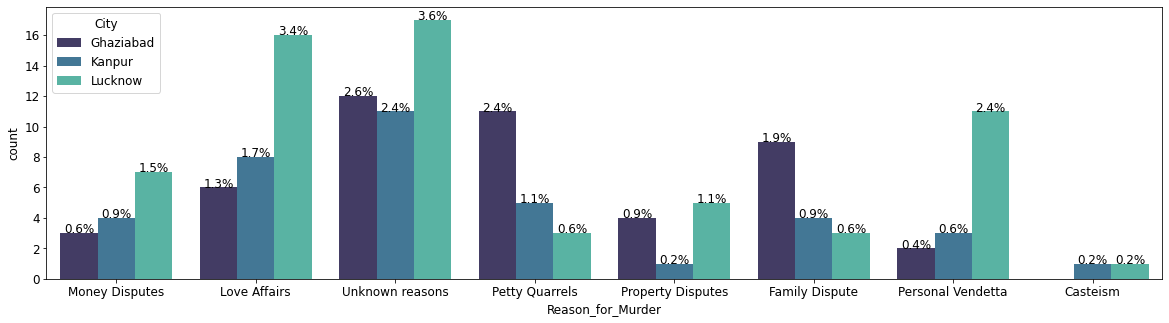

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))
sns.countplot(x = "Reason_for_Murder", data=train_df, hue = "City", ax = ax, palette="mako")
write_percent(ax)

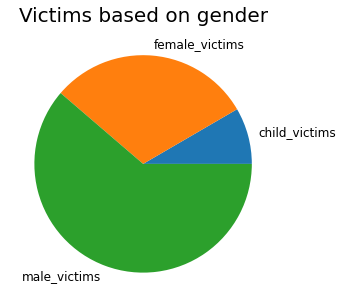

In [24]:
child_vics = train_df[train_df["Number of child victims"] != 0]
female_vics = train_df[train_df["Number of female victims(adult)"] != 0]
male_vics = train_df[train_df["Number of male victims(adult)"] != 0 ]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender',fontsize = 20)
plt.pie(x = values,labels = labels)
plt.show()

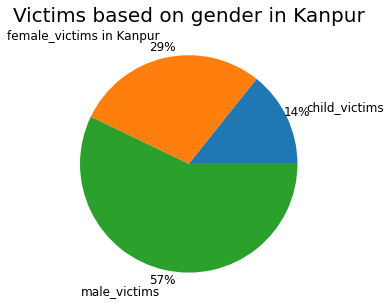

In [25]:
child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Kanpur")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Kanpur")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Kanpur")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims in Kanpur", "male_victims"]
plt.title('Victims based on gender in Kanpur',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

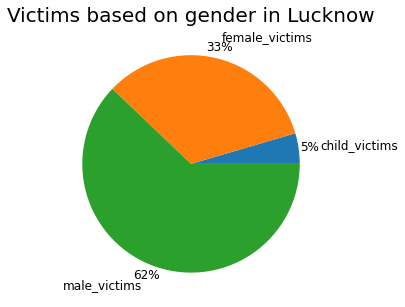

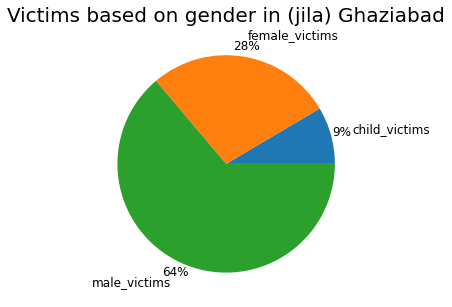

In [26]:
child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Lucknow")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Lucknow")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Lucknow")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender in Lucknow',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Ghaziabad")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Ghaziabad")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Ghaziabad")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender in (jila) Ghaziabad',fontsize = 20)
plt.pie(x = values,labels = labels,  autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

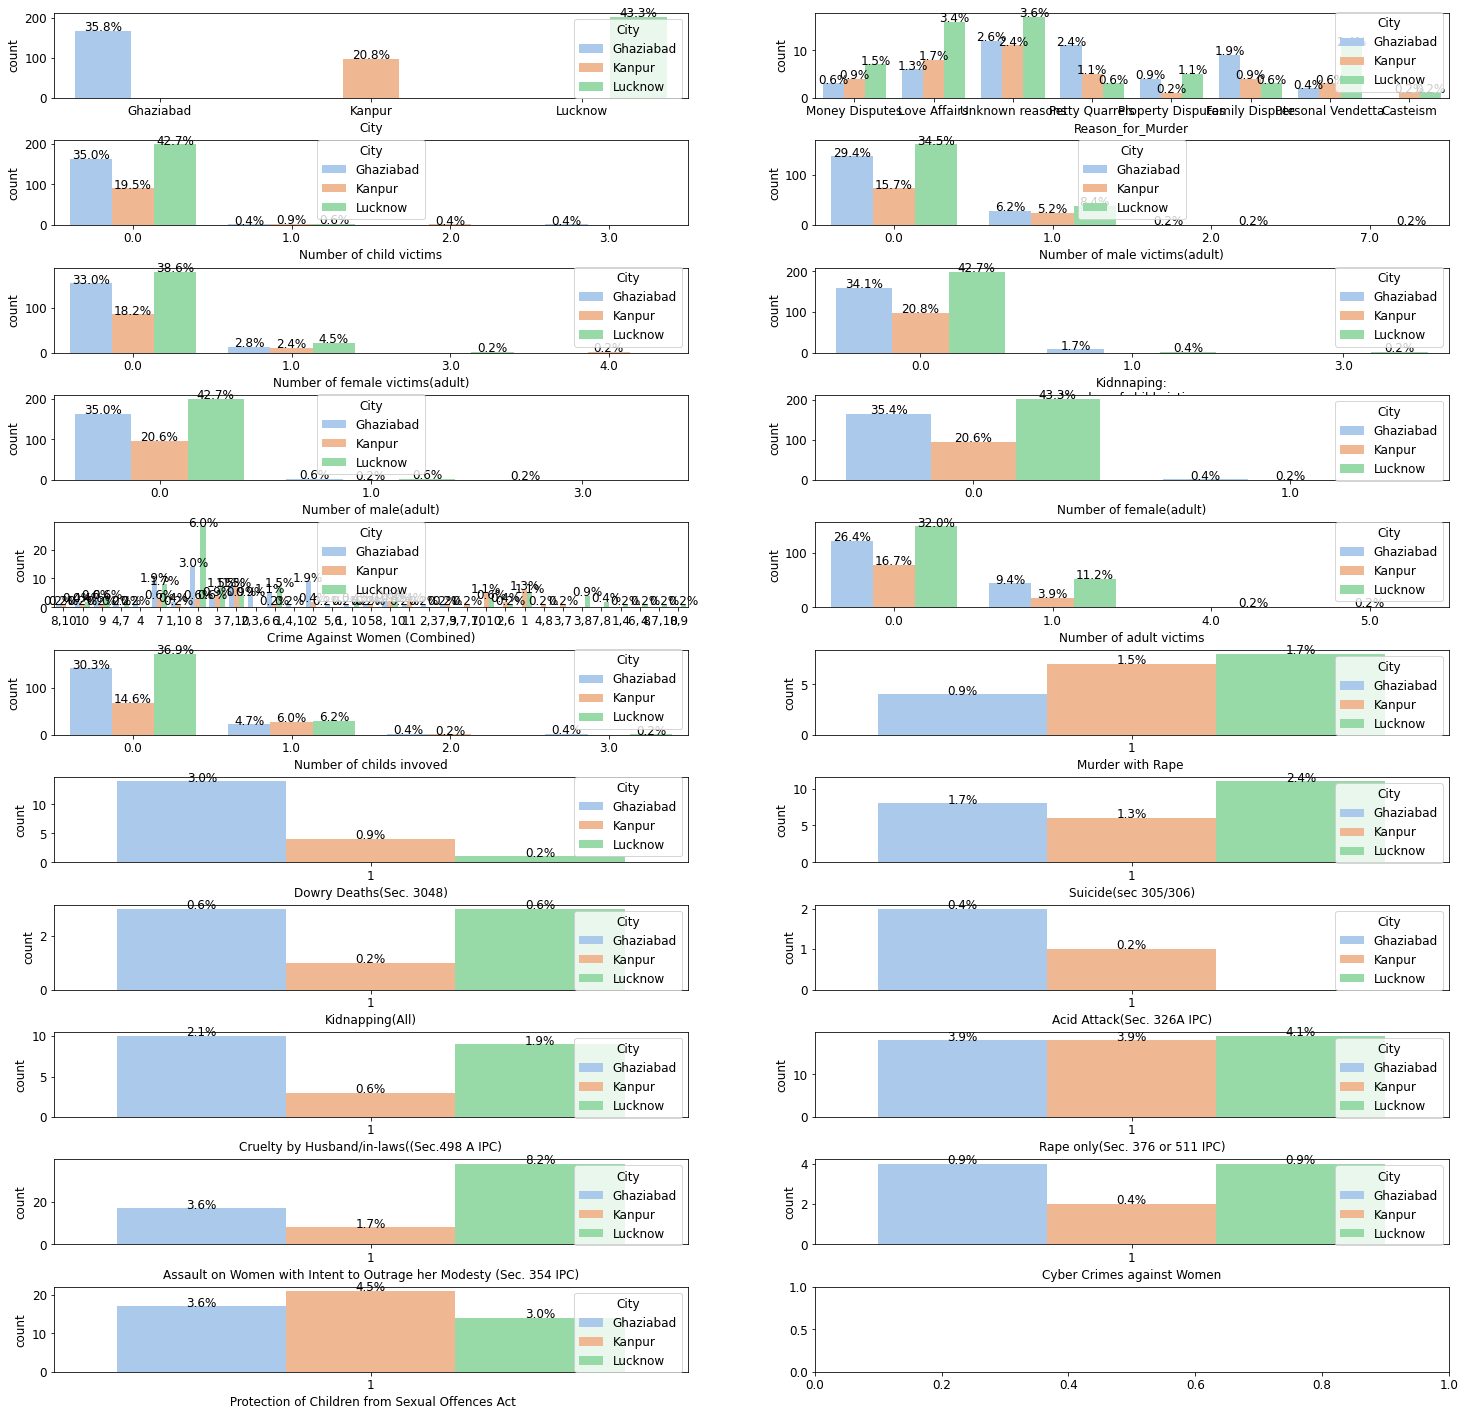

In [27]:
fig, axes = plt.subplots(nrows = 11, ncols= 2)
fig.set_size_inches(25, 25
                   )
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for idx, cols in enumerate(train_df.columns):
    row ,col = get_row_col_index(idx)
    ax = axes[row, col]
    
    sns.countplot(data = train_df, x = cols, hue = "City",  palette='pastel',ax = ax)
    write_percent(ax)

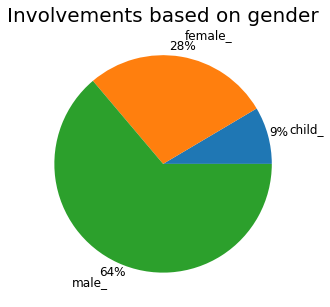

In [28]:
child = train_df[train_df["Number of childs invoved"] != 0]
female = train_df[train_df["Number of female(adult)"] != 0]
male = train_df[train_df["Number of male(adult)"] != 0 ]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_", "female_", "male_"]
plt.title('Involvements based on gender',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

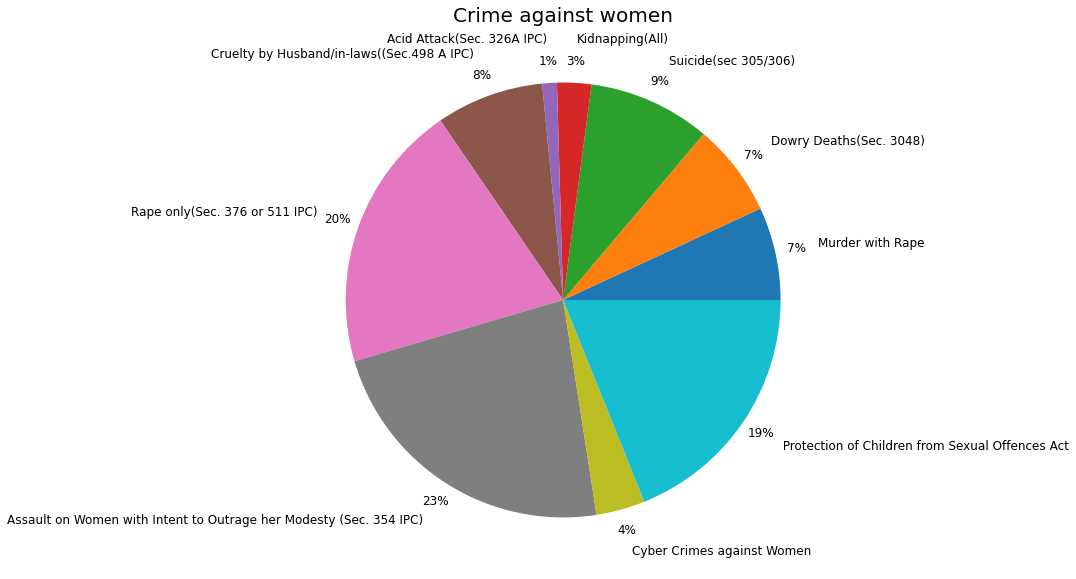

In [29]:
map_crime_against_wmn = {}
for vals in reason_mapping.values():
    map_crime_against_wmn[vals] = train_df[vals].sum()


plt.figure(figsize = (10,10))
plt.title('Crime against women',fontsize = 20)
plt.pie(x =  map_crime_against_wmn.values(), labels = map_crime_against_wmn.keys(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()